**Author : Fouad Amrani**

# Analysis of customers churn in a Telecom-enterprise 

**Telco dataset** from the website **Kaggle**. The goal of the dataset is to predict the behaviour of the customers and find those who are more likely to leave the enterprise.
The **target** variable is the **Churn** variable which is binary (No/yes).

In [1]:
#Import some useful librairies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Import the Telco dataset
Telco = pd.read_csv("D:/DSTI/Survival analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv",sep=',', keep_default_na=False)

In [3]:
#Number of rows and columns in the dataset
Telco.shape

(7043, 21)

In [4]:
Telco.loc[Telco['TotalCharges'] == ' ', 'TotalCharges'] = np.nan

In [5]:
Telco['TotalCharges'] = pd.to_numeric(Telco.TotalCharges, errors='coerce')

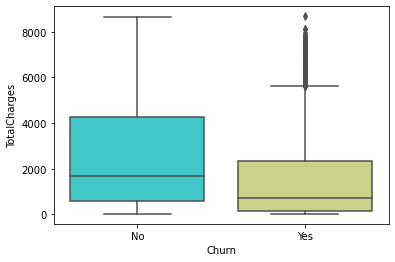

In [6]:
# TotalCharges by Churn status
sns.boxplot(x='Churn',y='TotalCharges',data=Telco,palette='rainbow')

The TotalCharges seems to be higher for customers who stay in the enterprise vs the other

In [7]:
#Describe numeric variables
Telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#Check for missing value 
Telco.isnull().values.any()

True

The dataframe contains missing values

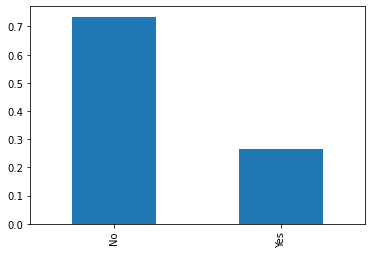

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#Proportion of individual who will leave the Telco enterprise
Telco['Churn'].value_counts(normalize=True).plot.bar()

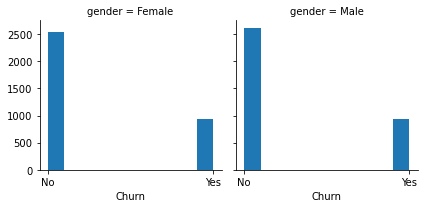

In [10]:
#Check if the distribution is different by gender
#Check for the training set distribution of Survival by Sex
g = sns.FacetGrid(Telco, col="gender")
g.map(plt.hist, "Churn");

It does not seem to have difference between gender

d:\miniconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


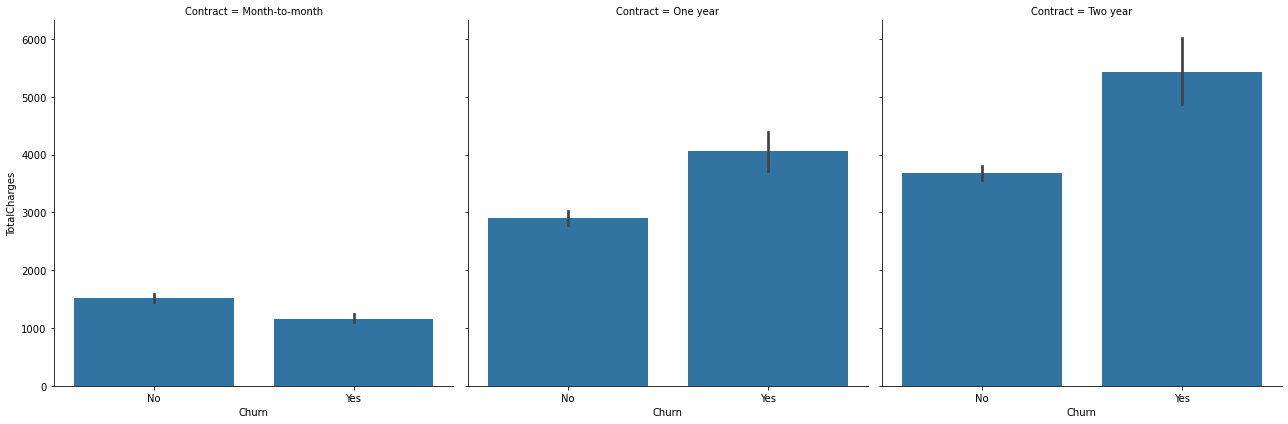

In [11]:
# Relation between TotalCharges, type of Contract and Churn status
g = sns.FacetGrid(Telco, col="Contract", height=6)
g.map(sns.barplot, "Churn", "TotalCharges");

TotalCharges seem high for customer with two year contract

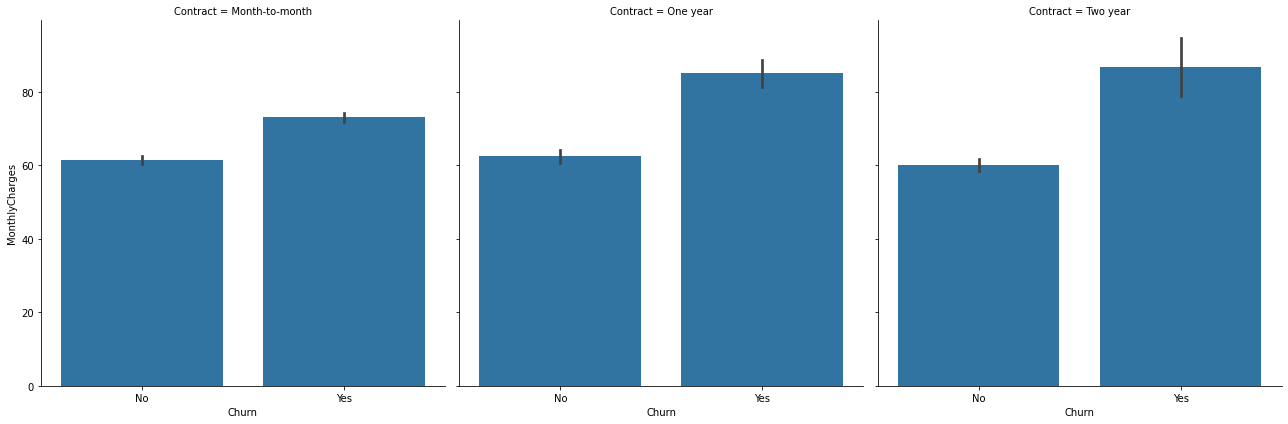

In [12]:
# Relation between MonthlyCharges, type of Contract and Churn status
g = sns.FacetGrid(Telco, col="Contract", height=6)
g.map(sns.barplot, "Churn", "MonthlyCharges");

In [13]:
#Get binary columns and transform them into dummy (0-1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
binary_cols   = Telco.nunique()[Telco.nunique() == 2].keys().tolist()
for cols in binary_cols :
    Telco[cols] = le.fit_transform(Telco[cols])

In [14]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [15]:
#Display firsts rows of the dataset
Telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [16]:
# Display type of each variables of the dataset
Telco.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [17]:
# Select columns to transform into binary variables
col_to_dummy = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV',
                'StreamingMovies','Contract','PaymentMethod']        
Telco = pd.get_dummies(Telco,columns=col_to_dummy)
Telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [18]:
#Import libraries for modelling
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

d:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
#Show the rows where there is at least one missing value
Telco[Telco.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,4472-LVYGI,0,0,1,1,0,0,1,52.55,NaN,...,1,0,0,0,0,1,1,0,0,0
753,3115-CZMZD,1,0,0,1,0,1,0,20.25,NaN,...,0,1,0,0,0,1,0,0,0,1
936,5709-LVOEQ,0,0,1,1,0,1,0,80.85,NaN,...,0,0,1,0,0,1,0,0,0,1
1082,4367-NUYAO,1,0,1,1,0,1,0,25.75,NaN,...,0,1,0,0,0,1,0,0,0,1
1340,1371-DWPAZ,0,0,1,1,0,0,0,56.05,NaN,...,1,0,0,0,0,1,0,1,0,0
3331,7644-OMVMY,1,0,1,1,0,1,0,19.85,NaN,...,0,1,0,0,0,1,0,0,0,1
3826,3213-VVOLG,1,0,1,1,0,1,0,25.35,NaN,...,0,1,0,0,0,1,0,0,0,1
4380,2520-SGTTA,0,0,1,1,0,1,0,20.00,NaN,...,0,1,0,0,0,1,0,0,0,1
5218,2923-ARZLG,1,0,1,1,0,1,1,19.70,NaN,...,0,1,0,0,1,0,0,0,0,1
6670,4075-WKNIU,0,0,1,1,0,1,0,73.35,NaN,...,1,0,0,0,0,1,0,0,0,1


This shows the dataset has 11 missing values in the TotalCharges column. We can safely delete these rows as their number is not so high comparing to the size of the dataset

In [20]:
#Drop the rows where there is at least 1 missing value
Telco = Telco.dropna()

In [21]:
# Check that 11 rows have been removed from the dataset, ok !
Telco.shape

(7032, 42)

In [22]:
#Re-scale the numeric columns 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
Telco[["tenure","MonthlyCharges","TotalCharges"]] = pd.DataFrame(scale.fit_transform(Telco[["tenure","MonthlyCharges","TotalCharges"]].values), columns = ["tenure","MonthlyCharges","TotalCharges"], index=Telco.index)

In [23]:
# Split the dataframe
from sklearn.model_selection import train_test_split
#Remove the id and Churn columns as they are not relevant for training
X_train = Telco.drop(['Churn', 'customerID'], axis=1)
y_train = Telco['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [24]:
#Try a Logistic Regression model
clf = LogisticRegression(random_state=8,solver='lbfgs', max_iter=10000)
clf = clf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
#Compute accuracy using Logistic regression and Tree models
def compute_score(clf, X_train, y_train, scoring='accuracy'):
    xval = cross_val_score(clf, X_train, y_train, cv = 5, scoring=scoring)
    return np.mean(xval)
logreg = LogisticRegression()
DT = DecisionTreeClassifier(random_state=8)
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, DT, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(model, X_train, y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8001777777777779
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.7299555555555555
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.7998222222222222
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7932444444444445
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8
****


Logistic regression seems to perform quite good (accuracy of 80%)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.857


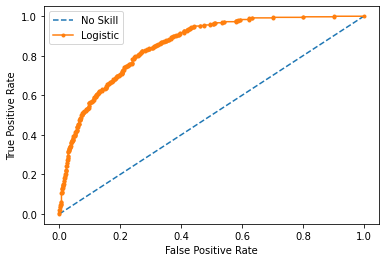

In [26]:
#Display AUC comparing logistic regression with "no-skill" model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The AUC is 0.85 which is quite good

In [27]:
#Improve the model though variable selection
from sklearn.feature_selection import RFE
#Select top 10 features
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, 10)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

d:\miniconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Num Features: 10
Selected Features: [False False False False  True False False False  True  True False False
 False  True False  True False False False False False False False False
  True False False False False False False False  True  True False  True
 False False  True False]
Feature Ranking: [30  5 29  3  1  9  2 26  1  1 16 25  7  1 11  1 17 12  8  6 27 20 10 31
  1 13 14 24 15  4 19 18  1  1 28  1 22 21  1 23]


In [28]:
#Correlation with output variable
cor = Telco.corr()
cor_target = abs(cor["Churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.3]
relevant_features

tenure                            0.354049
Churn                             1.000000
InternetService_Fiber optic       0.307463
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
Contract_Month-to-month           0.404565
Contract_Two year                 0.301552
PaymentMethod_Electronic check    0.301455
Name: Churn, dtype: float64

In [29]:
#Print correlations between selected variables (independent variables)
print(Telco[["InternetService_Fiber optic","OnlineSecurity_No","TechSupport_No",
            "Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check"]].corr())

                                InternetService_Fiber optic  \
InternetService_Fiber optic                        1.000000   
OnlineSecurity_No                                  0.411006   
TechSupport_No                                     0.401869   
Contract_Month-to-month                            0.243014   
Contract_Two year                                 -0.209965   
PaymentMethod_Electronic check                     0.335763   

                                OnlineSecurity_No  TechSupport_No  \
InternetService_Fiber optic              0.411006        0.401869   
OnlineSecurity_No                        1.000000        0.470113   
TechSupport_No                           0.470113        1.000000   
Contract_Month-to-month                  0.402548        0.438473   
Contract_Two year                       -0.352447       -0.397788   
PaymentMethod_Electronic check           0.335854        0.338529   

                                Contract_Month-to-month  Contract_Two year

It does not seem to exist correlation between these variables so we will select them and fit a logistic regression model for the data

In [30]:
# Create a list with columns to keep
col_to_keep = ["tenure","Churn","InternetService_Fiber optic","OnlineSecurity_No","TechSupport_No",
"Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check"]

In [31]:
#Keep 8 columns 
Telco = Telco[col_to_keep]

In [32]:
#Rename column names containing spaces
Telco = Telco.rename(columns={"PaymentMethod_Electronic check": "PaymentMethod_Electronic_check","InternetService_Fiber optic": "InternetService_Fiber_optic","Contract_Two year":"Contract_Two_year","Contract_Month-to-month":"Contract_Month_to_month"})

In [33]:
# Split the dataframe
from sklearn.model_selection import train_test_split
#Remove the id and Churn columns as they are not relevant for training
X_train = Telco.drop(['Churn'], axis=1)
y_train = Telco['Churn']
train_data, test_data = train_test_split(Telco, test_size=0.2,random_state = 123)

In [34]:
#upgrade pip
#!"d:\miniconda3\python.exe" -m pip install --upgrade pip

In [35]:
#Install statsmodels library with pip
#!pip install statsmodels

In [36]:
#Check column names
train_data.columns

Index(['tenure', 'Churn', 'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'TechSupport_No', 'Contract_Month_to_month', 'Contract_Two_year',
       'PaymentMethod_Electronic_check'],
      dtype='object')

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
formula = ('Churn ~ tenure + InternetService_Fiber_optic + OnlineSecurity_No + TechSupport_No + Contract_Month_to_month + Contract_Two_year + PaymentMethod_Electronic_check')
model = logit(formula = formula,data = train_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.424509
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5617
Method:                           MLE   Df Model:                            7
Date:                Thu, 22 Oct 2020   Pseudo R-squ.:                  0.2581
Time:                        17:34:41   Log-Likelihood:                -2387.9
converged:                       True   LL-Null:                       -3218.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.1094      0.135    -15.666      0.000      -2.373      -1.845
tenure                            -1.8519      0.155    -11.981      0.000      -2.155      -1.549
InternetService_Fiber_optic        0.9959      0.083     11.940      0.000       0.832       1.159
OnlineSecurity_No                  0.5794      0.087      6.666      0.000       0.409       0.750
TechSupport_No                     0.3717      0.087      4.292      0.000       0.202       0.541
Contract_Month_to_month            0.7311      0.118      6.186      0.000       0.499       0.963
Contract_Two_year                 -0.6003      0.191     -3.139      0.002      -0.975      -0.225
PaymentMethod_Electronic_check     0.4727      0.076      6.240      0.000       0.324       0.621
==================================================================================================
"""

In [38]:
#Let's see the confidence interval associated with the odds ratio of each variable
params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                      5%       95%  Odds Ratio
Intercept                       0.093173  0.157951    0.121313
tenure                          0.115920  0.212472    0.156938
InternetService_Fiber_optic     2.298849  3.187936    2.707136
OnlineSecurity_No               1.505373  2.116522    1.784981
TechSupport_No                  1.223826  1.718534    1.450237
Contract_Month_to_month         1.647781  2.618855    2.077330
Contract_Two_year               0.377130  0.798125    0.548632
PaymentMethod_Electronic_check  1.383005  1.861192    1.604380


All presented odds ratio are significant with a very low p-value. It seems that having a **Two-year contract** decrease the probability to keep a customer. However customers with **no Online_security, no Tech_support, having a month-to-month contract or paying by electronic check** are more likely to leave the enterprise !

In [39]:
# Split the dataframe
from sklearn.model_selection import train_test_split
#Remove the id and Churn columns as they are not relevant for training
X_train = Telco.drop(['Churn'], axis=1)
y_train = Telco['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [40]:
#Try a decision tree model
clf = LogisticRegression(random_state=8,solver='lbfgs', max_iter=10000)
clf = clf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(model, X_train, y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.7985777777777777
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.7592888888888889
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.7985777777777777
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7624888888888888
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.7943111111111112
****


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.837


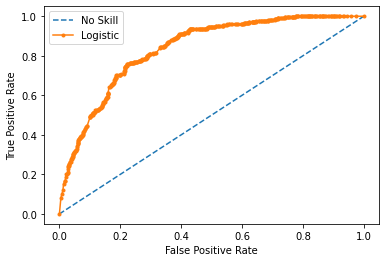

In [42]:
#Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The model seems a bit better after selecting few variables (8 variables including the target variable "Churn").
The AUC remained almost the same but we have now a much simpler model !

In [46]:
#!pip install -U notebook-as-pdf
#!pyppeteer-install
!jupyter-nbconvert --to PDFviaHTML Churn_customers_analysis.ipynb

[NbConvertApp] Converting notebook Churn_customers_analysis.ipynb to PDFviaHTML
[NbConvertApp] Writing 472120 bytes to Churn_customers_analysis.pdf
